# Load Data

In [1]:
import pandas as pd
import numpy as  np
df = pd.read_csv('mnist_train.csv')
X = df.drop(['label'],axis=1).values
y = df['label'].values
X.shape

df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()


print('Real Image: ',y[0])

<Figure size 640x480 with 1 Axes>

Real Image:  5


In [3]:
# splite dataset
X_train, X_test, y_train, y_test = X[:50000], X[50000:], y[:50000], y[50000:]


# Training a Binary Classifier

we will classify 5. so we need to create a label array (y) where all 5 will be true otherwise false

y_old =[ 5,5,2,1]     
y_new = [T,T,F,F]

In [4]:
y_train_5 = (y_train==5)
print(y_train_5)

[ True False False ... False False False]


In [5]:
y_test_5 = (y_test==5)
print(y_test_5)

[False False False ...  True False False]


## Stochastic Gradient Descent (SGD)

In [6]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
print('Real Output:',y_test_5[0])

print('Predicted Output: ',sgd_clf.predict(X_test[0].reshape(1,784)))

Real Output: False
Predicted Output:  [False]


## Performance Measures

## Cross-Validation

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.92452151, 0.96256075, 0.96219849])

## Confusion Matrix


In [9]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


Just like the cross_val_score() function, cross_val_predict() performs K-fold
cross-validation, but instead of returning the evaluation scores, it returns the predic‐
tions made on each test fold. This means that you get a clean prediction for each
instance in the training set (“clean” meaning that the prediction is made by a model
that never saw the data during training).

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[43915,  1579],
       [  933,  3573]], dtype=int64)

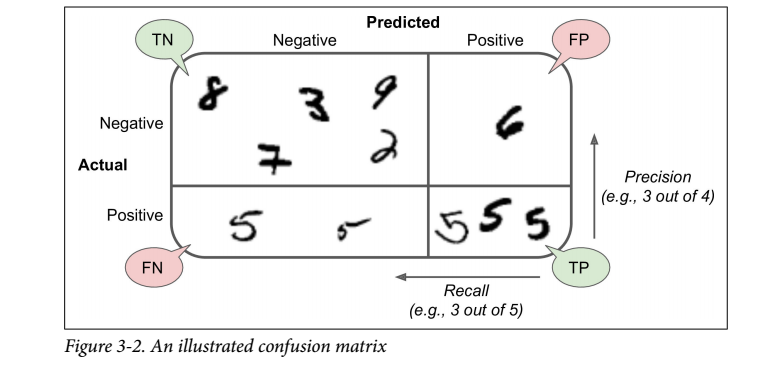

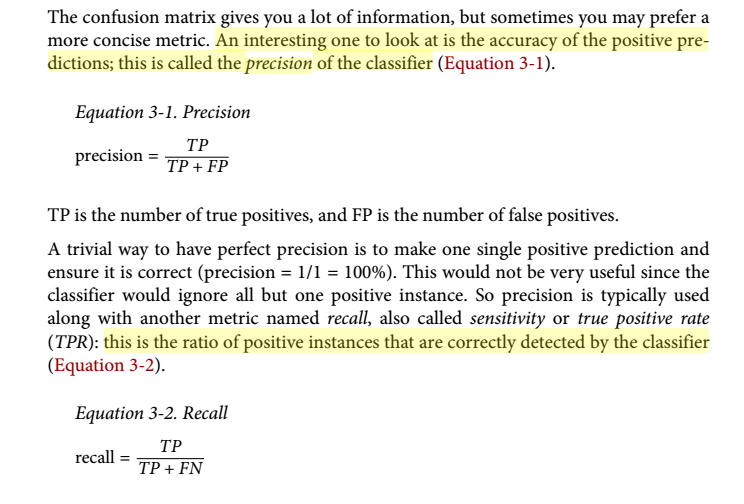

### Precision and Recall

In [11]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) 


0.6935170807453416

In [12]:
recall_score(y_train_5, y_train_pred)

0.7929427430093209

Now your 5-detector does not look as shiny as it did when you looked at its accuracy.
When it claims an image represents a 5, it is correct only 69% of the time. More‐
over, it only detects 79% of the 5s

## F1 Score
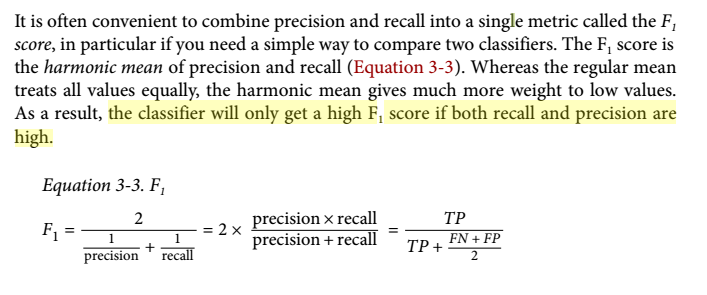

In [13]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7399047421826466

The F1
score favors classifiers that have similar precision and recall. This is not always
what you want: in some contexts you mostly care about precision, and in other con‐
texts you really care about recall. For example, if you trained a classifier to detect vid‐
eos that are safe for kids, you would probably prefer a classifier that rejects many
good videos (low recall) but keeps only safe ones (high precision), rather than a clas‐
sifier that has a much higher recall but lets a few really bad videos show up in your
product (in such cases, you may even want to add a human pipeline to check the clas‐
sifier’s video selection). 

## Precision/Recall Tradeoff

To understand this tradeoff, let’s look at how the SGDClassifier makes its classifica‐
tion decisions. For each instance, it computes a score based on a decision function, 
and if that score is greater than a threshold, it assigns the instance to the positive
class, or else it assigns it to the negative class. Figure 3-3 shows a few digits positioned
from the lowest score on the left to the highest score on the right. Suppose the deci‐
sion threshold is positioned at the central arrow (between the two 5s): you will find 4
true positives (actual 5s) on the right of that threshold, and one false positive (actually
a 6). Therefore, with that threshold, the precision is 80% (4 out of 5). But out of 6
actual 5s, the classifier only detects 4, so the recall is 67% (4 out of 6). Now if you
raise the threshold (move it to the arrow on the right), the false positive (the 6)
becomes a true negative, thereby increasing precision (up to 100% in this case), but
one true positive becomes a false negative, decreasing recall down to 50%. Conversely,
lowering the threshold increases recall and reduces precision.

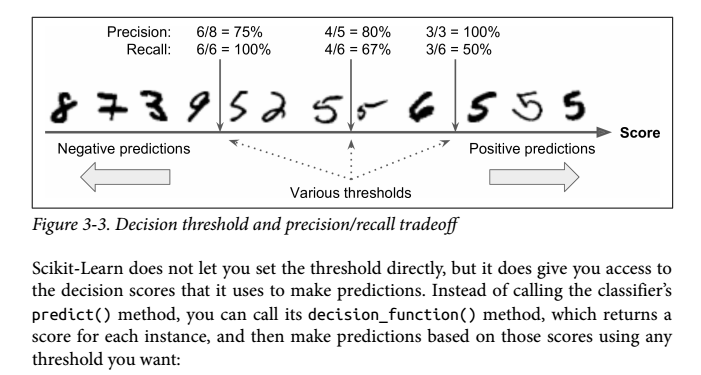

In [14]:
print('Real Output:',y_test_5[0])
print('Predicted Output: ',sgd_clf.predict(X_test[0].reshape(1,784)))
y_scores = sgd_clf.decision_function(X_test[0].reshape(1,784))
print(y_scores)

print('Real Output:',y_test_5[-3])
print('Predicted Output: ',sgd_clf.predict(X_test[-3].reshape(1,784)))
y_scores = sgd_clf.decision_function(X_test[-3].reshape(1,784))
print(y_scores)

Real Output: False
Predicted Output:  [False]
[-4815.92538135]
Real Output: True
Predicted Output:  [ True]
[9189.81798561]


Now how do you decide which threshold to use? For this you will first need to get the
scores of all instances in the training set using the cross_val_predict() function
again, but this time specifying that you want it to return decision scores instead of
predictions:

In [15]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,  method="decision_function")

print(y_scores)

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
print(precisions, recalls, thresholds)

[  1902.21078142 -21112.48537428 -25649.15397715 ...  -9753.09461656
 -20665.10028864  -8734.7627444 ]
[0.09058015 0.09056187 0.09056369 ... 1.         1.         1.        ] [1.00000000e+00 9.99778074e-01 9.99778074e-01 ... 4.43852641e-04
 2.21926320e-04 0.00000000e+00] [-79427.19799449 -79280.71592247 -79243.98353757 ...  39298.6011494
  43830.14498336  46470.40005884]


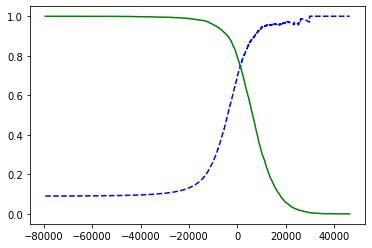

In [16]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
     plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
     plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
     [...] # highlight the threshold, add the legend, axis label and grid
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### Get 90% precision

In [17]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
y_train_pred_90 = (y_scores >= threshold_90_precision)

precision_score(y_train_5, y_train_pred_90)

0.9002178649237472

In [18]:
recall_score(y_train_5, y_train_pred_90)

0.45849977807367953

Great, you have a 90% precision classifier ! As you can see, it is fairly easy to create a
classifier with virtually any precision you want: just set a high enough threshold, and
you’re done. Hmm, not so fast. A high-precision classifier is not very useful if its 
recall is too low!

If someone says “let’s reach 99% precision,” you should ask, “at
what recall?”


## The receiver operating characteristic (ROC) curve 

It is very similar to the precision/recall curve, but instead of plot‐
ting precision versus recall, the ROC curve plots the true positive rate (another name
for recall) against the false positive rate.


The FPR is the ratio of negative instances that
are incorrectly classified as positive. It is equal to one minus the true negative rate, 
which is the ratio of negative instances that are correctly classified as negative. The
TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus
1 – specificity.


In [19]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

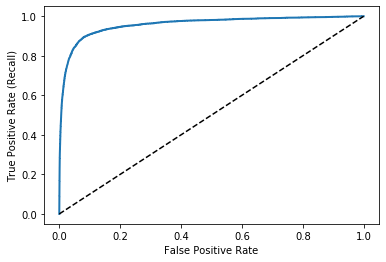

In [20]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 #[...] # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()


### AUC (area under the curve)

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)


0.957975431165074

One way to compare classifiers is to measure the area under the curve (AUC). A per‐
fect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC
AUC:

### Test with Random Forest

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
 method="predict_proba")


the RandomForestClassi
fier class does not have a decision_function() method. Instead it has a pre
dict_proba() method. Scikit-Learn classifiers generally have one or the other. The
predict_proba() method returns an array containing a row per instance and a col‐
umn per class, each containing the probability that the given instance belongs to the
given class (e.g., 70% chance that the image represents a 5)


you need scores, not probabilities. A simple solution is to
use the positive class’s probability as the score:


In [22]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
 method="predict_proba")

C:\Users\BC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\BC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\BC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[ Neg class probability , Pos class probability]




we only need the value for the positive class! that is our dicision score!!

In [23]:
y_probas_forest[:, 1] 

array([0.7, 0. , 0. , ..., 0. , 0. , 0. ])

In [24]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

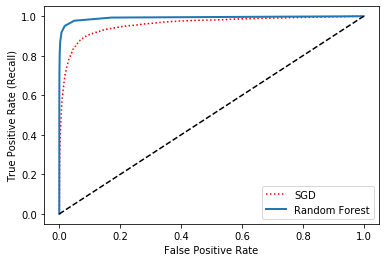

In [25]:
plt.plot(fpr, tpr, "r:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()


In [26]:
roc_auc_score(y_train_5, y_scores_forest)

0.9925194356509379

Ggd was 95 and randomForest 99

so RandomForest is better!


# Multiclass Classification

Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are
capable of handling multiple classes directly. Others (such as Support Vector Machine
classifiers or Linear classifiers) are strictly binary classifiers.

one way to create a system that can classify the digit images into 10
classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a
1-detector, a 2-detector, and so on). Then when you want to classify an image, you get
the decision score from each classifier for that image and you select the class whose
classifier outputs the highest score. This is called the one-versus-all (OvA) strategy 
(also called one-versus-the-rest).
Another strategy is to train a binary classifier for every pair of digits: one to distin‐
guish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on.
This is called the one-versus-one (OvO) strategy. If there are N classes, you need to
train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45
binary classifiers!

In [44]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Scikit-Learn detects when you try to use a binary classification algorithm for a multi‐
class classification task, and it automatically runs OvA (except for SVM classifiers for
which it uses OvO). Let’s try this with the SGDClassifier

## one-versus-one or one-versus-all

If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use
the OneVsOneClassifier or OneVsRestClassifier classes. Simply create an instance
and pass a binary classifier to its constructor. For example, this code creates a multi‐
class classifier using the OvO strategy, based on a SGDClassifier

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)


# Error Analysis

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

# Multilabel Classification

Until now each instance has always been assigned to just one class. In some cases you
may want your classifier to output multiple classes for each instance. 


EXAMPLE: we will find out that the digit is geater then 7 and odd !!

In [29]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_large

array([False, False, False, ...,  True, False,  True])

In [30]:
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [ True, False],
       [False, False],
       [ True, False]])

In [31]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier
instance (which supports multilabel classification, but not all classifiers do) and we
train it using the multiple targets array. 

In [35]:
print(knn_clf.predict([X_train[0]]))
print(y_train[0])

[[False  True]]
5


[ >7 and odd]

5 is less then 7 but its odd so [ False , True ]

# Multioutput Classification

The last type of classification task we are going to discuss here is called multioutput￾multiclass classification (or simply multioutput classification). It is simply a generaliza‐
tion of multilabel classification where each label can be multiclass (i.e., it can have
more than two possible values).
To illustrate this, let’s build a system that removes noise from images. It will take as
input a noisy digit image, and it will (hopefully) output a clean digit image, repre‐
sented as an array of pixel intensities, just like the MNIST images. Notice that the
classifier’s output is multilabel (one label per pixel) and each label can have multiple
values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput
classification system.







In [43]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
print('Shape of X:',X_train_mod.shape)
y_train_mod = X_train
print('Shape of Y:',y_train_mod.shape)
y_test_mod = X_test


Shape of X: (50000, 784)
Shape of Y: (50000, 784)


label and feature has same shape! 

In [38]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])